In [202]:
import numpy as np
import pandas as pd
import sklearn
import xgboost as xgb
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as st

import os
sns.set()
%matplotlib inline

In [203]:
import ipywidgets as widgets
from ipywidgets import interact, HBox, Label

In [204]:
df = pd.read_csv('../Данные/out_w_date_an_orig.csv', parse_dates=True)
df['add_time'] = pd.to_datetime(df['add_time'], format='%Y-%m-%d')
kcp = pd.read_csv('../Данные/kcp.csv', index_col=0)

In [205]:
kcp = kcp.drop(['index'], axis=1)

In [206]:
kcp

,name,kcp
0,Информатика и вычислительная техника,38
1,Информационные системы и технологии,40
2,Программная инженерия,56
3,Радиотехника,30
4,Приборостроение,21
5,Оптотехника,10
6,Фотоника и оптоинформатика,11
7,Лазерная техника и лазерные технологии,21
8,Теплоэнергетика и теплотехника,11
9,Энергетическое машиностроение,11


In [207]:
kcp = kcp.groupby(['name']).agg({'kcp': lambda x: x}).transpose()

In [208]:
df.isna().sum()

abiturient_id    0
status           0
add_time         0
id               0
name             0
true             0
ex               0
point            0
eduform_id       0
fintype_id       0
dtype: int64

In [209]:
df.dtypes

abiturient_id             int64
status                    int64
add_time         datetime64[ns]
id                        int64
name                     object
true                      int64
ex                       object
point                    object
eduform_id                int64
fintype_id                int64
dtype: object

In [210]:
df['point_mean'] = df['point'].apply(lambda x: sum(map(int, x.split(',')))/len(x.split(',')))
df['point_sum'] = df['point'].apply(lambda x: sum(map(int, x.split(','))))
df = df[df['point_mean'] > 0].reset_index(drop=True)

In [211]:
df.head()

,abiturient_id,status,add_time,id,name,true,ex,point,eduform_id,fintype_id,point_mean,point_sum
0,202100008,1,2021-04-09,11,Машиностроение,1,"Математика,Физика,Русский язык","74,55,72",2,2,67.000000,201
1,202100009,1,2021-04-22,3,Программная инженерия,1,"Математика,Информатика и ИКТ,Русский язык","98,88,59",2,2,81.666667,245
2,202100622,1,2021-06-24,33,Проектирование авиационных и ракетных двигателей,0,"Математика,Физика,Русский язык","72,51,76",1,1,66.333333,199
3,202100622,1,2021-06-24,18,Ракетные комплексы и космонавтика,0,"Математика,Физика,Русский язык","72,51,76",1,1,66.333333,199
4,202100622,1,2021-06-24,32,"Проектирование, производство и эксплуатация ра...",0,"Математика,Физика,Русский язык","72,51,76",1,1,66.333333,199


In [212]:
pd.value_counts(df['eduform_id'], normalize=True)

1    0.974383
2    0.015615
3    0.010002
Name: eduform_id, dtype: float64

In [213]:
pd.value_counts(df['fintype_id'], normalize=True)

1    0.739743
2    0.260257
Name: fintype_id, dtype: float64

In [214]:
df = df[(df['fintype_id'] == 1) & (df['eduform_id'] == 1)].reset_index(drop=True)

In [215]:
df.isna().sum()

abiturient_id    0
status           0
add_time         0
id               0
name             0
true             0
ex               0
point            0
eduform_id       0
fintype_id       0
point_mean       0
point_sum        0
dtype: int64

<AxesSubplot:xlabel='true', ylabel='point_mean'>

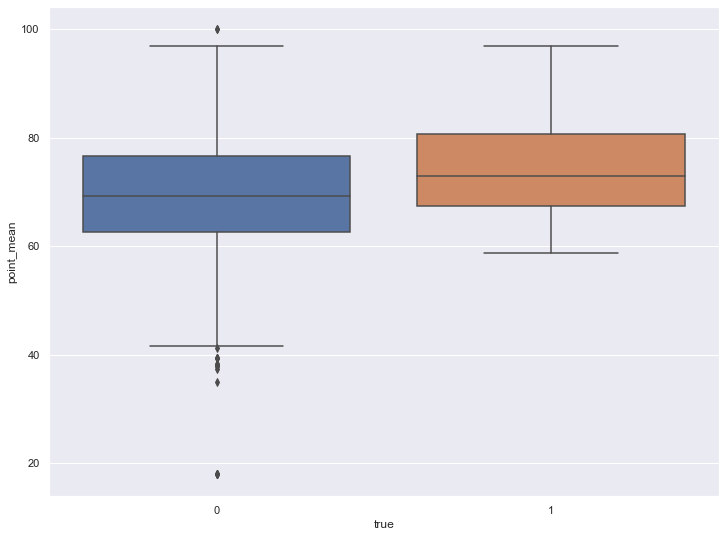

In [216]:
fig, ax = plt.subplots(figsize=(12, 9))
sns.boxplot(data=df, x='true', y='point_mean', ax=ax)

In [217]:
pd.value_counts(df['status'], normalize=True)

1    0.626242
0    0.373758
Name: status, dtype: float64

In [218]:
pd.value_counts(df['true'], normalize=True)

0    0.850855
1    0.149145
Name: true, dtype: float64

In [219]:
gdf_mean = df.groupby(['name']).agg({'point_mean': ['mean'],
                                    }).transpose()

In [220]:
gdf_mean

,name,Баллистика и гидроаэродинамика,Боеприпасы и взрыватели,Двигатели летательных аппаратов,Интегрированные системы летательных аппаратов,Информатика и вычислительная техника,Информационные системы и технологии,Конструкторско-технологическое обеспечение машиностроительных производств,Лазерная техника и лазерные технологии,Машиностроение,Мехатроника и робототехника,...,Ракетные комплексы и космонавтика,Системы управления летательными аппаратами,Специальные организационно-технические системы,Стандартизация и метрология,"Стрелково-пушечное, артиллерийское и ракетное оружие",Теплоэнергетика и теплотехника,Технологические машины и оборудование,Управление в технических системах,Фотоника и оптоинформатика,Энергетическое машиностроение
point_mean,mean,64.649691,63.639698,68.84887,74.47651,75.485003,75.24878,64.228632,70.050562,66.64539,71.998544,...,69.665808,73.564394,67.136752,65.2625,64.923977,68.910714,62.908463,68.25974,75.678657,67.090909


In [221]:
df['spec_mean_point'] = [gdf_mean[df.iloc[i]['name']][0] for i in range(df.shape[0])]

In [222]:
df.head()

,abiturient_id,status,add_time,id,name,true,ex,point,eduform_id,fintype_id,point_mean,point_sum,spec_mean_point
0,202100622,1,2021-06-24,33,Проектирование авиационных и ракетных двигателей,0,"Математика,Физика,Русский язык","72,51,76",1,1,66.333333,199,67.647911
1,202100622,1,2021-06-24,18,Ракетные комплексы и космонавтика,0,"Математика,Физика,Русский язык","72,51,76",1,1,66.333333,199,69.665808
2,202100622,1,2021-06-24,32,"Проектирование, производство и эксплуатация ра...",0,"Математика,Физика,Русский язык","72,51,76",1,1,66.333333,199,69.914573
3,202100622,1,2021-06-24,8,Лазерная техника и лазерные технологии,0,"Математика,Физика,Русский язык","72,51,76",1,1,66.333333,199,70.050562
4,202100622,1,2021-06-24,6,Оптотехника,0,"Математика,Физика,Русский язык","72,51,76",1,1,66.333333,199,65.981352


In [223]:
df['bal_above_id'] = 0
df['bal_above_id_kcp'] = 0

In [224]:
for i in range(df.shape[0]):
    row = df.iloc[i]
    df.loc[i, ['bal_above_id']] = df[(df['name'] == row['name']) & (df['point_sum'] >= row['point_sum'])].shape[0]
    df.loc[i, ['bal_above_id_kcp']] = df[(df['name'] == row['name']) & (df['point_sum'] >= row['point_sum'])].shape[0]/kcp[row['name']][0]

In [225]:
df.isna().sum()

abiturient_id       0
status              0
add_time            0
id                  0
name                0
true                0
ex                  0
point               0
eduform_id          0
fintype_id          0
point_mean          0
point_sum           0
spec_mean_point     0
bal_above_id        0
bal_above_id_kcp    0
dtype: int64

In [259]:
def spec_bal_above_boxplot(spec):
    spec_df = df[df['name'] == spec]
    
    fst_group = spec_df[spec_df['true'] == 0]
    sec_group = spec_df[spec_df['true'] == 1]

    # Проверка стат гипотез

    # Проверка на нормальность

    p_vals = np.array([
        st.normaltest(fst_group['bal_above_id_kcp'])[1],
        st.normaltest(sec_group['bal_above_id_kcp'])[1]
    ])
    print('Проверка на нормальность')
    print(f'P-value для группы 0: {p_vals[0]:5.4f}')
    print(f'P-value для группы 1: {p_vals[1]:5.4f}')

    if np.all(p_vals > 0.05):
        print('Обе выборки нормальны. t-тест Стьюдента')
        print(st.ttest_ind(fst_group['bal_above_id_kcp'], sec_group['bal_above_id_kcp']))
    else:
        print('Выборки ненормальны. U-критерий Мана-Уитни')
        print(st.mannwhitneyu(fst_group['bal_above_id_kcp'], sec_group['bal_above_id_kcp']))
    
    
    fig, ax = plt.subplots(figsize=(12, 9))
    sns.boxplot(data=spec_df, x='true', y='bal_above_id_kcp', ax=ax)


dropdown_spec = widgets.Dropdown(
    options=df['name'].unique(),
)

interact(spec_bal_above_boxplot, spec=dropdown_spec);

interactive(children=(Dropdown(description='spec', options=('Проектирование авиационных и ракетных двигателей'…

In [227]:
obs = pd.crosstab(df['status'], df['true'])

In [228]:
obs

true,0,1
status,,
0,2538,171
1,3629,910


In [229]:
st.chi2_contingency(obs, correction=True)

(251.1619160960226,
 1.449218256779353e-56,
 1,
 array([[2304.96730132,  404.03269868],
        [3862.03269868,  676.96730132]]))

In [230]:
st.fisher_exact(obs)

(3.7217734333077113, 5.369992877904009e-63)

In [231]:
a = obs.iloc[0, 0]
b = obs.iloc[0, 1]
c = obs.iloc[1, 0]
d = obs.iloc[1, 1]
pfi = (a*d - b*c)/np.sqrt((a+b)*(c+d)*(a+c)*(b+d))

In [232]:
pfi

0.1865523113378554

## Пытаемся предсказать подаст ли абитуриент на это заявление согласие

In [297]:
y = df['status']
X = df.drop(['abiturient_id', 'add_time', 'eduform_id', 'fintype_id', 'point', 'id', 'true', 'status'], axis=1)

In [298]:
X.tail()

,name,ex,point_mean,point_sum,spec_mean_point,bal_above_id,bal_above_id_kcp
7243,Информационные системы и технологии,"Математика,Информатика и ИКТ,Русский язык",64.666667,194,75.248780,513,12.825000
7244,Проектирование авиационных и ракетных двигателей,"Математика,Физика,Русский язык",50.333333,151,67.647911,385,25.666667
7245,Проектирование авиационных и ракетных двигателей,"Математика,Физика,Русский язык",54.000000,162,67.647911,379,25.266667
7246,Энергетическое машиностроение,"Математика,Физика,Русский язык",54.000000,162,67.090909,137,12.454545
7247,Двигатели летательных аппаратов,"Математика,Физика,Русский язык",54.000000,162,68.848870,229,12.052632


In [299]:
X.shape

(7248, 7)

In [300]:
X.isna().sum()

name                0
ex                  0
point_mean          0
point_sum           0
spec_mean_point     0
bal_above_id        0
bal_above_id_kcp    0
dtype: int64

In [301]:
pd.value_counts(y, normalize=True)

1    0.626242
0    0.373758
Name: status, dtype: float64

In [302]:
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_validate
from sklearn.preprocessing import LabelEncoder

### Разбиваем на обучающую и тестовую выборки

In [303]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [304]:
X_train.head()

,name,ex,point_mean,point_sum,spec_mean_point,bal_above_id,bal_above_id_kcp
6131,Программная инженерия,"Математика,Информатика и ИКТ,Русский язык",79.333333,238,76.076111,297,5.303571
6009,Программная инженерия,"Математика,Информатика и ИКТ,Русский язык",80.666667,242,76.076111,254,4.535714
12,Ракетные комплексы и космонавтика,"Математика,Физика,Русский язык",66.333333,199,69.665808,266,3.325000
1117,"Стрелково-пушечное, артиллерийское и ракетное ...","Математика,Физика,Русский язык",76.000000,228,64.923977,38,2.000000
5271,"Проектирование, производство и эксплуатация ра...","Математика,Физика,Русский язык",74.666667,224,69.914573,122,4.518519


In [305]:
X_train.head()

,name,ex,point_mean,point_sum,spec_mean_point,bal_above_id,bal_above_id_kcp
6131,Программная инженерия,"Математика,Информатика и ИКТ,Русский язык",79.333333,238,76.076111,297,5.303571
6009,Программная инженерия,"Математика,Информатика и ИКТ,Русский язык",80.666667,242,76.076111,254,4.535714
12,Ракетные комплексы и космонавтика,"Математика,Физика,Русский язык",66.333333,199,69.665808,266,3.325000
1117,"Стрелково-пушечное, артиллерийское и ракетное ...","Математика,Физика,Русский язык",76.000000,228,64.923977,38,2.000000
5271,"Проектирование, производство и эксплуатация ра...","Математика,Физика,Русский язык",74.666667,224,69.914573,122,4.518519


### Кодируем переменные

In [306]:
enc = LabelEncoder()

In [307]:
for i in ['name', 'ex']:
    X_train[i] = enc.fit_transform(X_train[i])
    X_test[i] = enc.transform(X_test[i])

In [308]:
X_train

,name,ex,point_mean,point_sum,spec_mean_point,bal_above_id,bal_above_id_kcp
6131,14,0,79.333333,238,76.076111,297,5.303571
6009,14,0,80.666667,242,76.076111,254,4.535714
12,19,1,66.333333,199,69.665808,266,3.325000
1117,23,1,76.000000,228,64.923977,38,2.000000
5271,16,1,74.666667,224,69.914573,122,4.518519
...,...,...,...,...,...,...,...
3772,28,1,67.000000,201,67.090909,67,6.090909
5191,28,1,58.666667,176,67.090909,131,11.909091
5226,3,0,76.000000,228,74.476510,66,4.125000
5390,3,0,58.666667,176,74.476510,140,8.750000


### Обучаем модели

In [309]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay, roc_auc_score, roc_curve, RocCurveDisplay

In [310]:
# clf = RandomForestClassifier(n_estimators=500,
#                              max_depth=25,
#                              oob_score=True)

In [311]:
# clf = GradientBoostingClassifier(n_estimators=500, max_depth=25, min_samples_split=3)

In [312]:
clf = xgb.XGBClassifier(n_estimators=500, max_depth=25,
                        scale_pos_weight=15, alpha=0.01, colsample_bylevel=0.5)

In [313]:
clf.fit(X_train, y_train)

C:\Users\sabbr\anaconda3\envs\ml_ds_nn_env\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\sabbr\anaconda3\envs\ml_ds_nn_env\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[18:46:49] WARNING: D:\bld\xgboost-split_1645118015404\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(alpha=0.01, base_score=0.5, booster='gbtree',
              colsample_bylevel=0.5, colsample_bynode=1, colsample_bytree=1,
              enable_categorical=False, gamma=0, gpu_id=-1,
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=25,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=500, n_jobs=16, num_parallel_tree=1,
              predictor='auto', random_state=0, reg_alpha=0.00999999978,
              reg_lambda=1, scale_pos_weight=15, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [314]:
# clf.oob_score_

In [315]:
clf.feature_importances_

array([0.08356351, 0.37014574, 0.11000416, 0.11690792, 0.1207286 ,
       0.11013301, 0.08851701], dtype=float32)

### Прогнозируем, смотрим метрики

In [316]:
y_pred = clf.predict(X_test)

In [317]:
accuracy_score(y_test, y_pred)

0.6199832775919732

In [318]:
precision_score(y_test, y_pred)

0.6424770198355104

In [319]:
recall_score(y_test, y_pred)

0.8865153538050734

C:\Users\sabbr\anaconda3\envs\ml_ds_nn_env\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


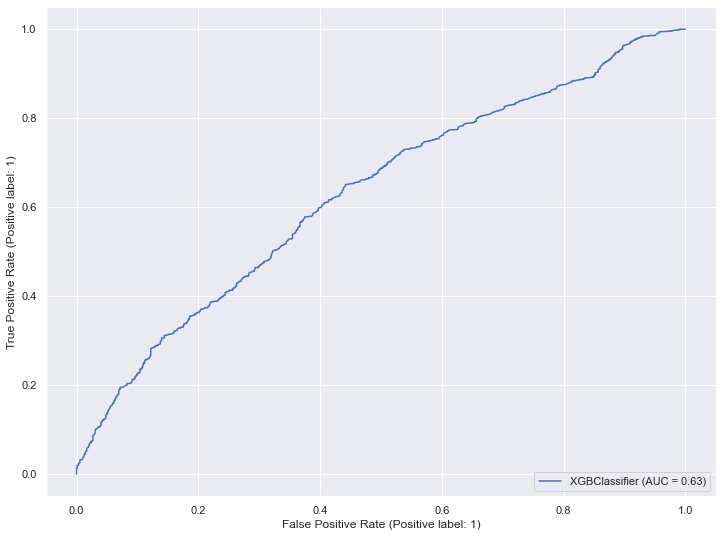

In [320]:
fig, ax = plt.subplots()
fig.set_size_inches((12, 9))
RocCurveDisplay.from_estimator(clf, X_test, y_test, ax=ax)

In [321]:
cnf_mt = confusion_matrix(y_test, y_pred)

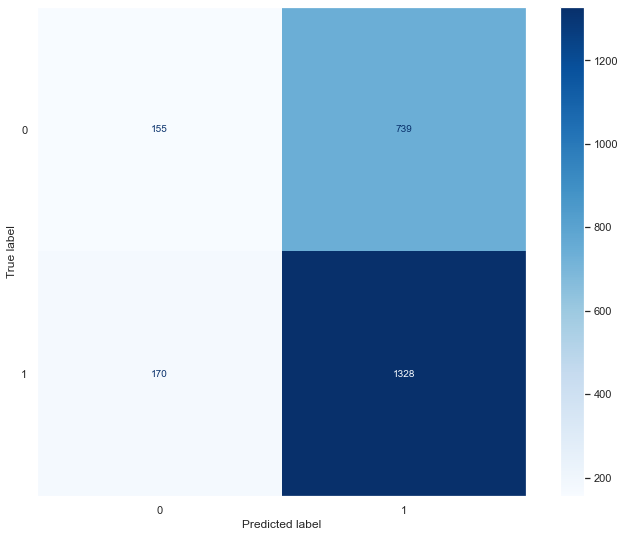

In [322]:
fig, ax = plt.subplots()
fig.set_size_inches((12, 9))
disp = ConfusionMatrixDisplay(cnf_mt)
disp.plot(ax=ax, cmap=plt.cm.Blues)
plt.grid(False)